# Student grades prediction

## Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description - total 43 columns

-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . 
    
    CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
### Predict - CGPA of a student based on different grades in four years.

## Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv


In [49]:
# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [50]:
os.chdir("F:\\FlipRobo\\Projects\\Students Grades Prediction\\")

In [51]:
df=pd.read_csv("Grades.csv",na_values=["?"])
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [52]:
df.shape

(571, 43)

In [53]:
for col in ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']:
    print(f'{col}=',df[col].value_counts())

PH-121= A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
HS-101= A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
CY-105= A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
HS-105/12= A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
MT-111= A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
CS-105= A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
CS-106= A-    116
B+    101
B      96
A      56
B-     54
C

## Exploratory data analysis

### Dropping "Seat No." : Being an alphanumeric number just represents identity of the student

In [54]:
df1=df.drop(columns="Seat No.",axis=1)
df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

#### Observations:

####  (i) All the variables are "object", except the CGPA which is a number.

####  (ii) There are some missing values. 

next: As missing values are categorical. They can be imputed by the mode of the variable.

### Missing values: imputing the missing values by the "mode" of the variable

In [56]:
for col in df1.columns.drop('CGPA'):
    df1[col]=df1[col].fillna(df1[col].mode()[0], inplace=False)
df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

#### Observation: Now there are no missing values. All the missing values have been suitably imputed.

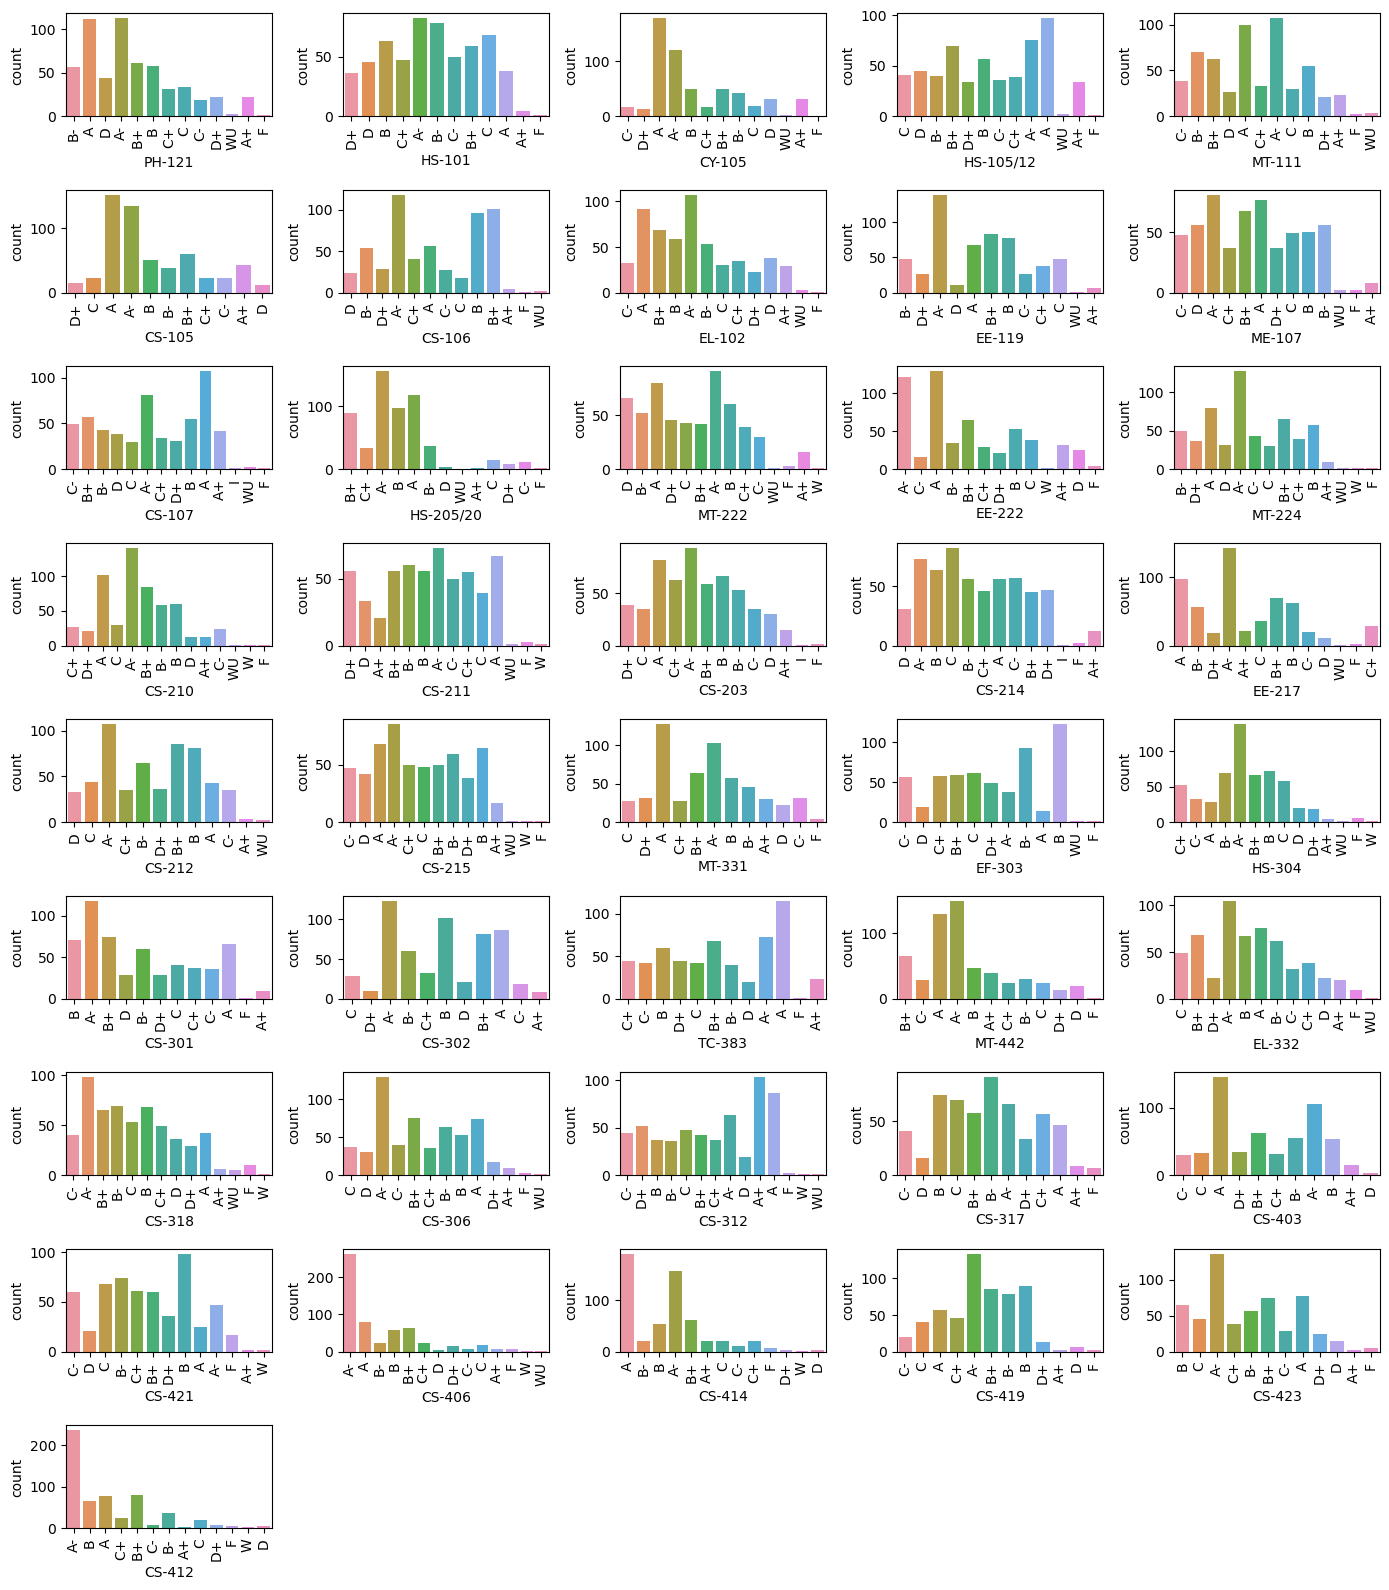

In [58]:
subjects = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
plt.figure(figsize=(14, 16))
num_plots = len(subjects)
num_cols = 5  # Number of columns
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure all plots are shown

for i, subject in enumerate(subjects, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=subject, data=df1)
    #plt.title(subject)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Ordinal encoding (grades are ordinal variable): Categorical to numerical

In [59]:
df1.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [60]:
grades=df1[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']].values.flatten()

grade_count=pd.Series(grades).value_counts()
grade_count

A-    4644
A     3535
B+    2724
B     2702
B-    2221
C     1612
C+    1556
C-    1341
D+    1141
D     1023
A+     726
F      121
WU      41
W       21
I        3
dtype: int64

#### Observation: There are 15 different grades.

In [61]:
grade_mapping = {'A+': 14, 'A': 13, 'A-': 12, 'B+': 11, 'B': 10, 'B-': 9, 'C+': 8, 'C': 7,
                 'C-': 6, 'D+': 5, 'D': 4, 'W': 3, 'WU': 2, 'I': 1, 'F': 0}

subjects = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for i in subjects:
    df1[i] = df1[i].map(grade_mapping)
df1.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,9,5,6,7,6,5,4,6,9,6,...,6,6,6,6,12,13,6,10,12,2.205
1,13,4,5,4,9,7,4,13,5,4,...,5,4,7,4,12,9,7,7,10,2.008
2,13,10,13,9,11,13,9,11,12,12,...,10,10,13,7,13,13,13,12,13,3.608
3,4,8,5,4,4,12,5,6,4,8,...,5,7,5,6,9,10,8,8,8,1.906
4,12,12,12,11,13,13,12,11,13,12,...,9,11,11,9,12,13,12,12,13,3.448


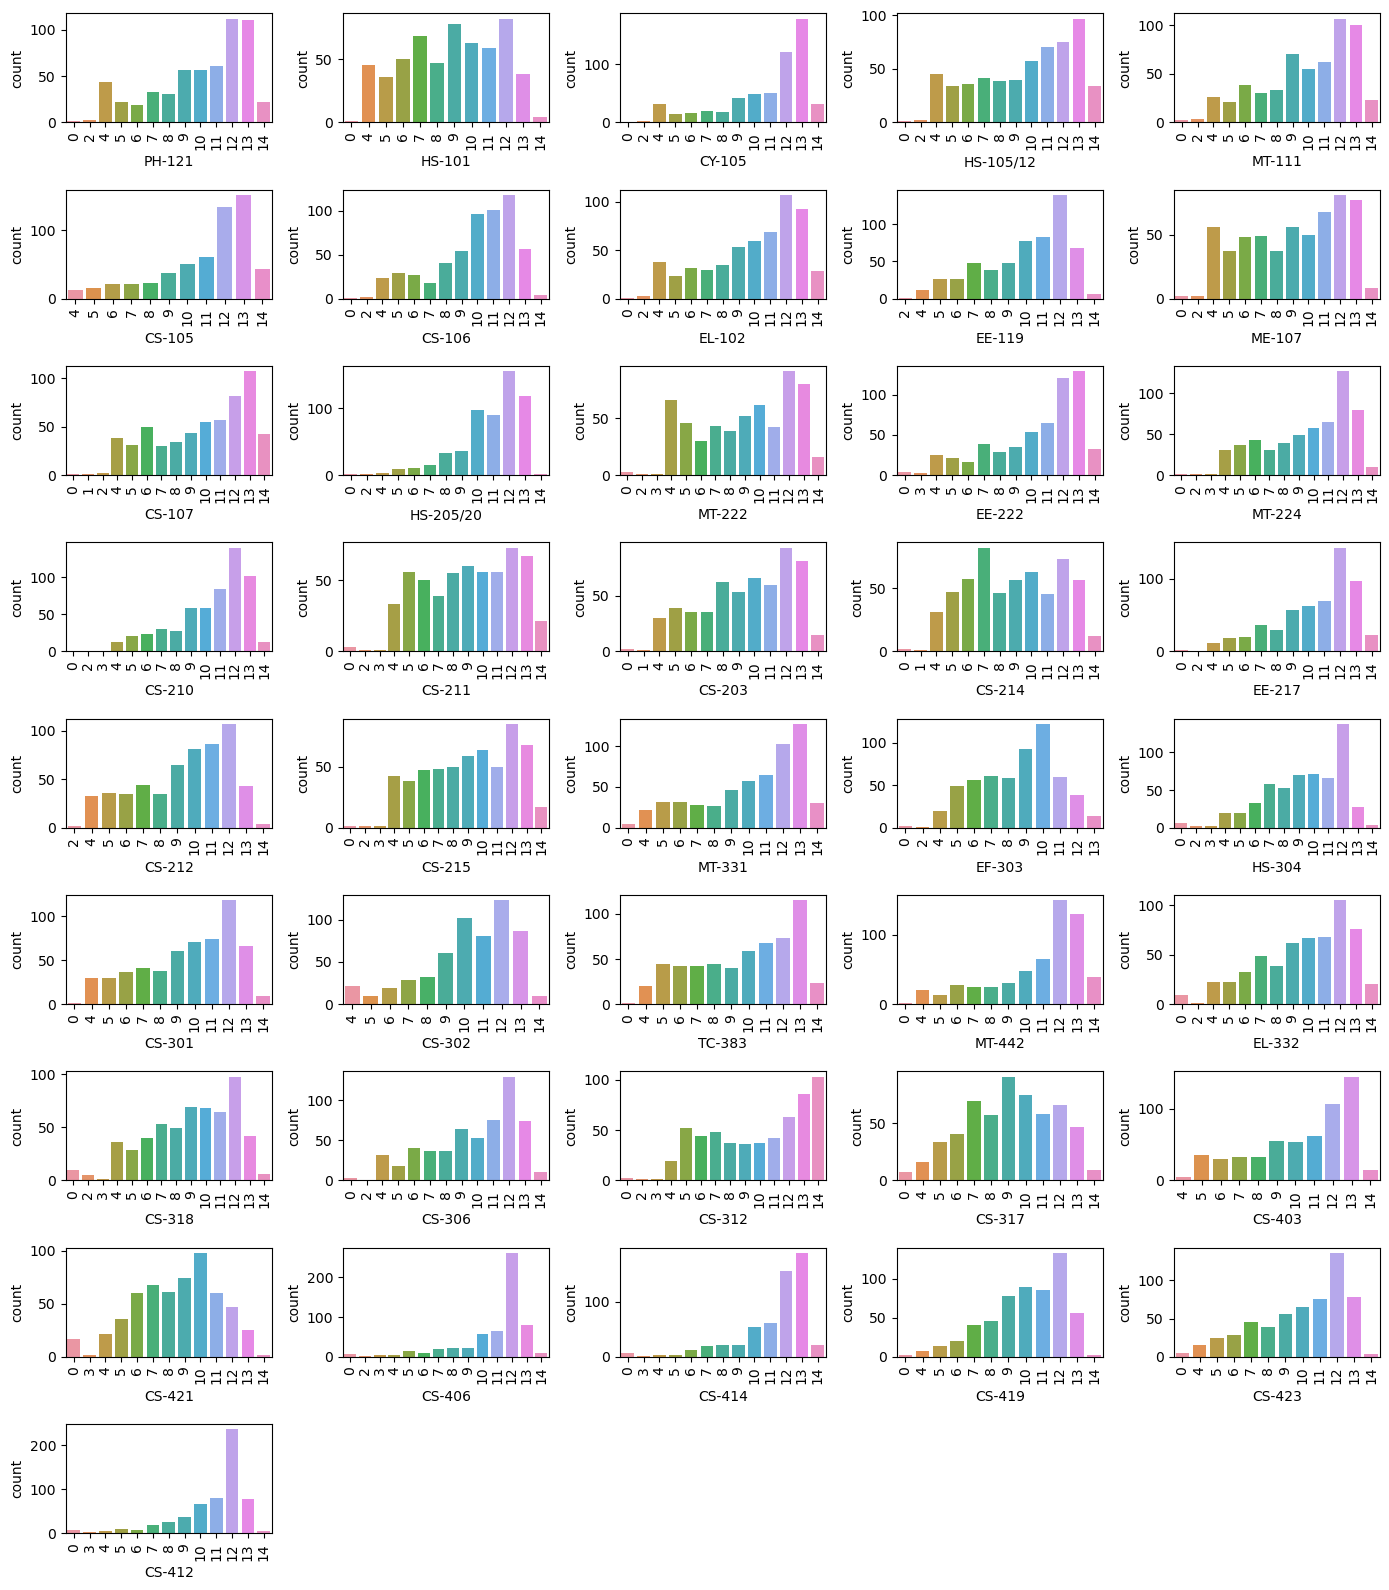

In [62]:
subjects = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
plt.figure(figsize=(14, 16))
for i, subject in enumerate(subjects, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=subject, data=df1)
    #plt.title(subject)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Skewness of the features
#### Variables are ordinal, so computing the skewness will be a good approach to estimate the shape of the distribution

In [63]:
subjects = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
skewness=[]
for i in subjects:
    sk=df1[i].skew()
    print(f'{i} = {sk:0.2f}')

PH-121 = -0.79
HS-101 = -0.21
CY-105 = -1.27
HS-105/12 = -0.48
MT-111 = -0.73
CS-105 = -1.12
CS-106 = -0.92
EL-102 = -0.71
EE-119 = -0.72
ME-107 = -0.34
CS-107 = -0.54
HS-205/20 = -1.48
MT-222 = -0.35
EE-222 = -1.05
MT-224 = -0.61
CS-210 = -0.99
CS-211 = -0.26
CS-203 = -0.50
CS-214 = -0.09
EE-217 = -0.99
CS-212 = -0.56
CS-215 = -0.28
MT-331 = -0.89
EF-303 = -0.37
HS-304 = -0.82
CS-301 = -0.62
CS-302 = -0.91
TC-383 = -0.46
MT-442 = -1.15
EL-332 = -0.85
CS-318 = -0.67
CS-306 = -0.76
CS-312 = -0.40
CS-317 = -0.46
CS-403 = -0.72
CS-421 = -0.70
CS-406 = -2.07
CS-414 = -2.11
CS-419 = -0.87
CS-423 = -0.92
CS-412 = -2.07


#### Observation: The grades for a number of courses are highly skewed. All the variables are negatively skewed.

Next: To transform the data in order to reduce the skewness

### Boxcox transformation

In [64]:
from scipy.stats import boxcox
df2=pd.DataFrame()
for i in subjects:
    transformed_data, lambda_value = boxcox(df1[i]+1) 
    df2[i]=transformed_data
    sk1=pd.Series(df2[i]).skew()
    print(f'{i} = {sk1:.2f}')

PH-121 = -0.32
HS-101 = -0.13
CY-105 = -0.48
HS-105/12 = -0.25
MT-111 = -0.27
CS-105 = -0.35
CS-106 = -0.27
EL-102 = -0.29
EE-119 = -0.25
ME-107 = -0.20
CS-107 = -0.27
HS-205/20 = -0.30
MT-222 = -0.22
EE-222 = -0.40
MT-224 = -0.28
CS-210 = -0.31
CS-211 = -0.15
CS-203 = -0.21
CS-214 = -0.09
EE-217 = -0.29
CS-212 = -0.23
CS-215 = -0.16
MT-331 = -0.36
EF-303 = -0.10
HS-304 = -0.25
CS-301 = -0.24
CS-302 = -0.21
TC-383 = -0.23
MT-442 = -0.39
EL-332 = -0.28
CS-318 = -0.24
CS-306 = -0.29
CS-312 = -0.24
CS-317 = -0.10
CS-403 = -0.30
CS-421 = -0.17
CS-406 = -0.55
CS-414 = -0.55
CS-419 = -0.20
CS-423 = -0.32
CS-412 = -0.49


#### Observation: It is clear that after the transformation, skewness of all the variables have considerably reduced.

### Multicollinearity

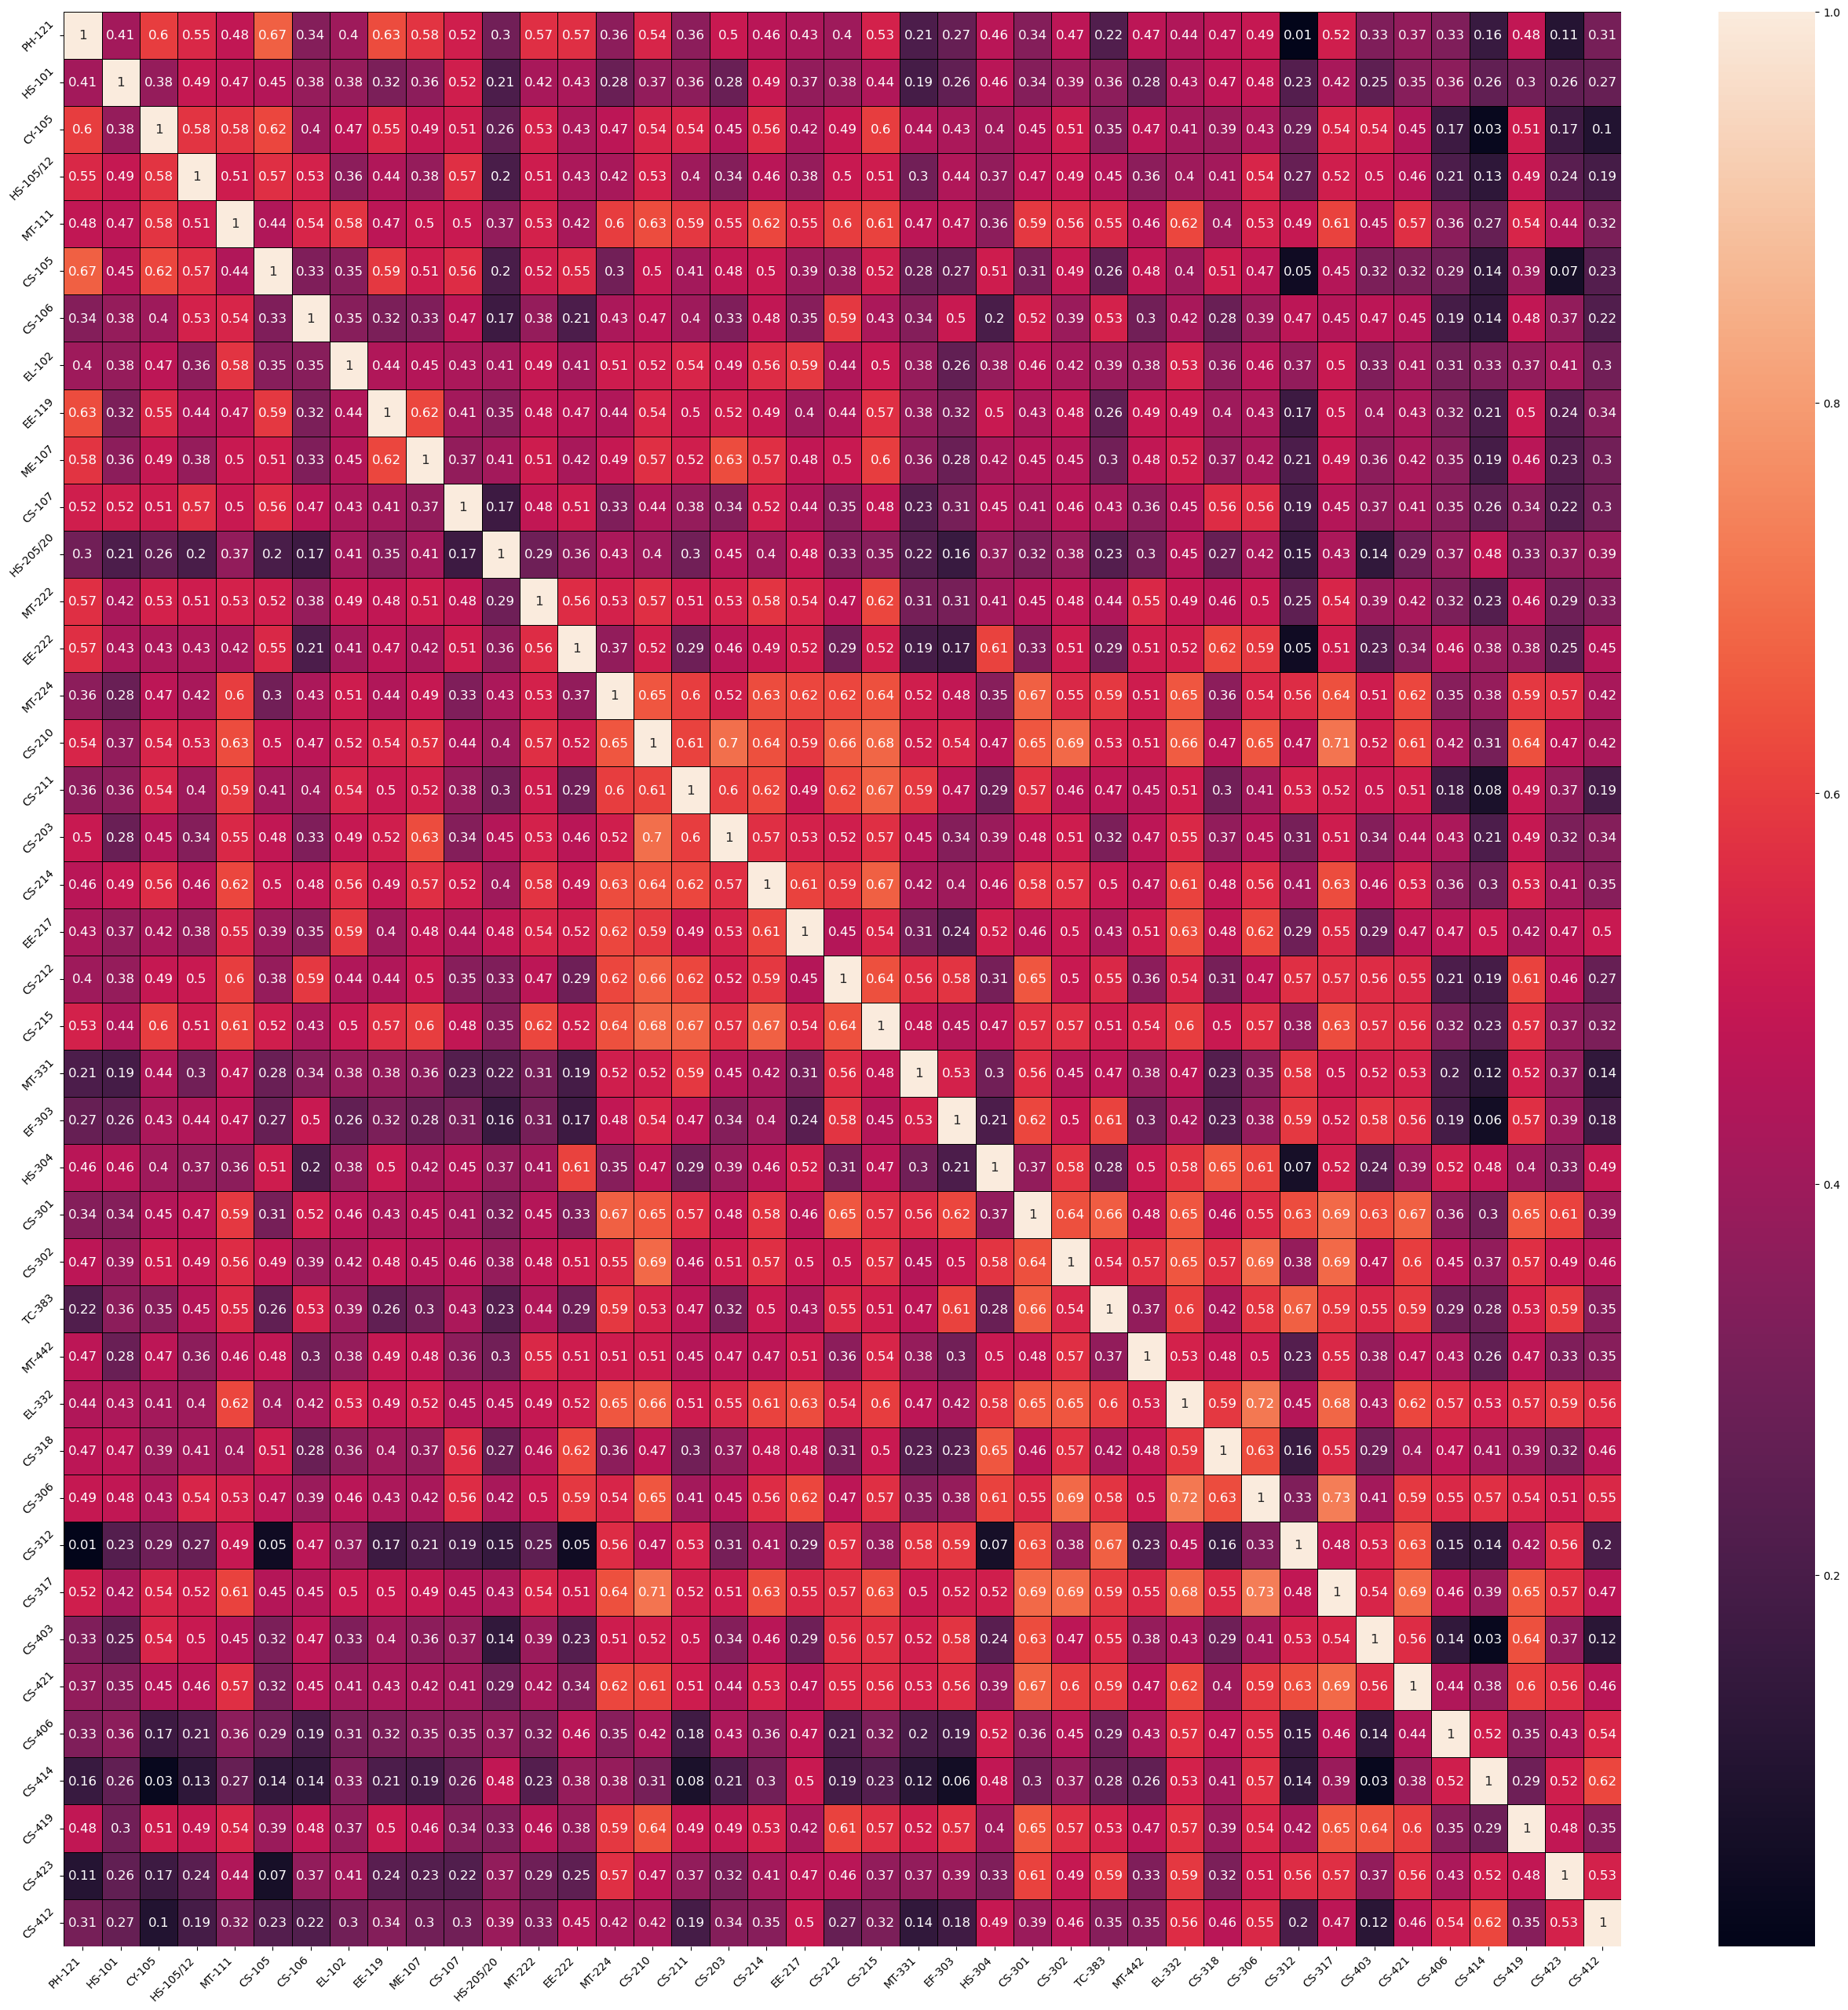

In [65]:
corr_matrix = abs(df2[subjects].corr()).round(2)
plt.figure(figsize=(32,32))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, linecolor='black', annot_kws={"size": 12})

plt.xticks(rotation=45, ha='right') # Rotate x-axis and y-axis labels
plt.yticks(rotation=45)

plt.show()


#### Observation: Maximum correlation is between CS-306 and CS-317, which is 0.73

### Splitting the feature and target columns

In [66]:
X=df2[subjects]
y=df['CGPA']

In [67]:
X.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,63.901605,6.090787,124.434870,16.420718,22.991717,92.351922,19.079776,23.125983,89.925049,9.073296,...,31.941409,10.544457,10.329665,46.741459,11.490674,3827.414919,3695.744778,36.797942,80.800953,2679.024905
1,131.730545,4.757633,77.588395,7.462202,46.957743,230.478738,19.079776,92.399434,27.166982,5.556061,...,12.122464,8.325281,6.157523,64.887351,6.699556,3827.414919,1101.165239,50.070864,40.462018,1474.510188
2,131.730545,13.251315,1035.861269,23.659042,67.482912,1361.528645,101.494419,68.014444,165.721754,21.442540,...,85.521569,20.722829,20.178321,255.147661,14.164577,5046.032226,3695.744778,180.806133,115.996061,3491.511836
3,14.148062,10.302033,77.588395,7.462202,11.599219,1076.247500,29.705884,23.125983,17.642349,12.926555,...,24.309866,8.325281,12.618269,31.968757,11.490674,1438.427201,1551.730478,65.655283,52.281092,719.600762
4,112.352598,16.292987,825.987832,31.801341,91.623280,1361.528645,190.165191,68.014444,196.917147,21.442540,...,85.521569,18.000247,22.906745,175.080806,20.008311,3827.414919,3695.744778,152.593543,115.996061,3491.511836


In [68]:
X.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,85.684090,11.574028,714.432133,27.282299,60.169660,947.392694,134.154583,60.444160,121.450583,15.420995,...,62.602263,21.338895,18.052678,168.602585,18.943310,3197.962503,2641.486811,111.450038,85.130962,2180.056663
std,40.902220,3.989558,358.196328,11.893864,26.966773,461.006274,61.764284,27.908160,54.113021,6.230445,...,28.192787,8.956172,6.682492,78.757385,7.846890,1442.912166,1163.288025,44.762532,37.790460,957.090483
min,0.000000,0.000000,0.000000,0.000000,0.000000,51.656515,0.000000,0.000000,5.089414,0.000000,...,0.000000,0.000000,0.000000,20.348399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.914208,8.867073,433.133348,16.420718,38.056713,633.427160,101.494419,38.314726,70.317783,9.073296,...,40.599822,12.903266,12.618269,112.099405,14.164577,2052.540424,1837.002207,83.629725,52.281092,1474.510188
50%,94.600676,11.764210,825.987832,27.621741,67.482912,1076.247500,127.516035,68.014444,137.543196,14.961519,...,72.746214,23.553035,17.550066,175.080806,20.008311,3827.414919,2830.679175,104.066669,97.552604,2679.024905
75%,112.352598,14.761444,1035.861269,36.190149,79.102266,1361.528645,190.165191,79.749700,165.721754,21.442540,...,85.521569,29.515955,22.906745,255.147661,23.159891,3827.414919,3695.744778,152.593543,115.996061,2679.024905
max,152.751348,19.414974,1278.899275,45.568750,105.044022,1694.681864,267.722755,105.961952,231.202225,26.041968,...,114.166500,32.639987,31.645904,301.966063,37.139141,6526.902835,4737.155288,211.727611,158.041069,4467.946529


#### Observation: The range of values vary across the features. 
Next: Using Standard Scaler    

### Standard Scaler: Scaling the features

In [69]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled.describe()



,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,...,571.000000,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02
mean,1.411597e-16,7.995161e-16,-1.648808e-16,-9.099551e-17,-6.299689e-17,2.924300e-16,3.060891e-16,2.510154e-16,-1.042171e-16,6.533011e-17,...,0.000000,-2.070731e-16,2.212669e-16,4.267845e-16,5.716385e-17,-1.298825e-15,6.517456e-16,-3.741899e-16,-5.152524e-16,-2.321552e-16
std,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,...,1.000877,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00
min,-2.096689e+00,-2.903624e+00,-1.996275e+00,-2.295824e+00,-2.233208e+00,-1.944706e+00,-2.173946e+00,-2.167723e+00,-2.152221e+00,-2.477273e+00,...,-2.222453,-2.384680e+00,-2.703858e+00,-1.884067e+00,-2.416234e+00,-2.218268e+00,-2.272698e+00,-2.491989e+00,-2.254686e+00,-2.279793e+00
25%,-8.508186e-01,-6.791050e-01,-7.860087e-01,-9.140095e-01,-8.207262e-01,-6.816411e-01,-5.292509e-01,-7.936330e-01,-9.457545e-01,-1.019713e+00,...,-0.781112,-9.427047e-01,-8.139440e-01,-7.180625e-01,-6.095311e-01,-7.945226e-01,-6.921673e-01,-6.220539e-01,-8.700257e-01,-7.378248e-01
50%,2.181888e-01,4.771170e-02,3.117104e-01,2.856425e-02,2.714327e-01,2.797528e-01,-1.075762e-01,2.714949e-01,2.976497e-01,-7.381166e-02,...,0.360122,2.474362e-01,-7.527925e-02,8.232753e-02,1.358416e-01,4.366200e-01,1.627785e-01,-1.650899e-01,3.289860e-01,5.217957e-01
75%,6.525781e-01,7.996402e-01,8.981414e-01,7.496016e-01,7.026872e-01,8.991181e-01,9.076397e-01,6.923591e-01,8.188415e-01,9.673184e-01,...,0.813662,9.138089e-01,7.270226e-01,1.099846e+00,5.378281e-01,4.366200e-01,9.070689e-01,9.199565e-01,8.174593e-01,5.217957e-01
max,1.641135e+00,1.967090e+00,1.577241e+00,1.538817e+00,1.665520e+00,1.622417e+00,2.164443e+00,1.632415e+00,2.029971e+00,1.706184e+00,...,1.830591,1.262928e+00,2.035939e+00,1.694830e+00,2.320892e+00,2.309121e+00,1.803084e+00,2.242177e+00,1.931017e+00,2.392559e+00


#### Observation: after scaling all the features are within similar range. 

Next: Data set is ready for model building.

## Model building

In [70]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

### Random state: To estimate the best random state

In [71]:
from sklearn.model_selection import train_test_split
r2_max=0
r_state=0
LR=LinearRegression()
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    
    model_LR=LR.fit(X_train,y_train)
    y_pred_LR=model_LR.predict(X_test)
    r2_LR=r2_score(y_test,y_pred_LR)
    if r2_LR>r2_max:
        r2_max=r2_LR
        r_state=i
print(f'Best r2 score: {r2_max}')
print(f'Random state: {r_state}')
     

Best r2 score: 0.9608631546839913
Random state: 301


#### Observation: Using linearregression, the best random state = 301, and the r2 score = 0.96

#### Train Test Split: Based on the random state = 301

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=301)

In [73]:
X_train.shape

(399, 41)

In [74]:
X_test.shape

(172, 41)

### Linear Regression

In [75]:
LR=LinearRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.9619182134257978
Mean absolute error: 0.09524720375971138
Mean square error: 0.015101918528868911
Cross validation score: 0.8709332383020986


### Ridge Regression

In [76]:
RR=Ridge()
model_RR=RR.fit(X_train,y_train)
y_pred_RR=model_RR.predict(X_test)
r2=r2_score(y_pred_RR,y_test)
MAE=mean_absolute_error(y_pred_RR,y_test)
MSE=mean_squared_error(y_pred_RR,y_test)
cv_score=cross_val_score(RR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.9619194964378803
Mean absolute error: 0.09524444264077382
Mean square error: 0.015101267865709717
Cross validation score: 0.8709386023767619


### Lasso Regression

In [77]:
LaR=Lasso()
model_LaR=LaR.fit(X_train,y_train)
y_pred_LaR=model_LaR.predict(X_test)
r2=r2_score(y_pred_LaR,y_test)
MAE=mean_absolute_error(y_pred_LaR,y_test)
MSE=mean_squared_error(y_pred_LaR,y_test)
cv_score=cross_val_score(LaR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.9257502624854663
Mean absolute error: 0.12753485851145135
Mean square error: 0.02571548494816948
Cross validation score: 0.8458223437333483


### Decission Tree Regression

In [78]:
DT=DecisionTreeRegressor()
model_DT=DT.fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
r2=r2_score(y_pred_DT,y_test)
MAE=mean_absolute_error(y_pred_DT,y_test)
MSE=mean_squared_error(y_pred_DT,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8349198198536293
Mean absolute error: 0.1754186046511628
Mean square error: 0.062029790697674406
Cross validation score: 0.805633169593604


### Random Forest Regression

In [79]:
RF=RandomForestRegressor()
model_RF=RF.fit(X_train,y_train)
y_pred_RF=model_RF.predict(X_test)
r2=r2_score(y_pred_RF,y_test)
MAE=mean_absolute_error(y_pred_RF,y_test)
MSE=mean_squared_error(y_pred_RF,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.9411423482080007
Mean absolute error: 0.101869941860465
Mean square error: 0.01890564243662787
Cross validation score: 0.9064897457944294


### Gradient Boosting Regression

In [80]:
GB=GradientBoostingRegressor()
model_GB=GB.fit(X_train,y_train)
y_pred_GB=model_GB.predict(X_test)
r2=r2_score(y_pred_GB,y_test)
MAE=mean_absolute_error(y_pred_GB,y_test)
MSE=mean_squared_error(y_pred_GB,y_test)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.9605768432752062
Mean absolute error: 0.08833395952038345
Mean square error: 0.013990892321106549
Cross validation score: 0.9122553474049802


### Adaboost Regression

In [81]:
AR=AdaBoostRegressor()
model_AR=AR.fit(X_train,y_train)
y_pred_AR=model_AR.predict(X_test)
r2=r2_score(y_pred_AR,y_test)
MAE=mean_absolute_error(y_pred_AR,y_test)
MSE=mean_squared_error(y_pred_AR,y_test)
cv_score=cross_val_score(AR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.8745258014667007
Mean absolute error: 0.14669312133390375
Mean square error: 0.03219135037406312
Cross validation score: 0.852962025894994


### Bagging Regression

In [82]:
BR=BaggingRegressor()
model_BR=BR.fit(X_train,y_train)
y_pred_BR=model_BR.predict(X_test)
r2=r2_score(y_pred_BR,y_test)
MAE=mean_absolute_error(y_pred_BR,y_test)
MSE=mean_squared_error(y_pred_BR,y_test)
cv_score=cross_val_score(BR,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.9374289301960453
Mean absolute error: 0.10774709302325584
Mean square error: 0.02108213319767443
Cross validation score: 0.9072828676772481


### K Neighbors Regression

In [83]:
KN=KNeighborsRegressor()
model_KN=KN.fit(X_train,y_train)
y_pred_KN=model_KN.predict(X_test)
r2=r2_score(y_pred_KN,y_test)
MAE=mean_absolute_error(y_pred_KN,y_test)
MSE=mean_squared_error(y_pred_KN,y_test)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'r2 score: {r2}')
print(f'Mean absolute error: {MAE}')
print(f'Mean square error: {MSE}')
print(f'Cross validation score: {cv_score}')

r2 score: 0.6950252940505427
Mean absolute error: 0.22696395348837212
Mean square error: 0.08578552395348837
Cross validation score: 0.7041458914706843


### Conclusion: Among all the regression models "Linear Regression" and "Ridge Regression" both have the highest r2 score(= 0.9619). However "Ridge Regression" which is very very marginally better than "Linear Regression".

Next: Therefore, selecting "Ridge Regression" for hyperparameter tuning to explore the possibilities to increase its accuracy further.

### Hyperparameter tuning: Ridge Regression

In [84]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(RR.get_params())

Parameters currently in use:

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}


In [85]:
from sklearn.model_selection import GridSearchCV
hyp = {
'alpha':np.logspace(-3, 3, 7)
}

grid_search = GridSearchCV(RR, param_grid=hyp, cv=10, scoring=make_scorer(r2_score), n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'alpha': 1000.0}
Best estimators: Ridge(alpha=1000.0)
Best score: 0.8732865056278468


####  Observation: After hyperparameter tuning with selected hyperparameters, the best parameters give a r2 score with Ridge Regression (0.873), which is lower than that of the default Ridge Regression (0.9619).

#### Therefore, saving the default Ridge Regression model as the final model.

### Saving the default Ridge Regression model

In [86]:
import pickle
file_name='student_grades.pkl'
pickle.dump(RR,open(file_name,'wb'))

### Loading the saved Ridge Regression model

In [87]:
loaded_model=pickle.load(open('student_grades.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.9608648408871956
